<a href="https://colab.research.google.com/github/nowoclock/PM_data/blob/main/PM_Merge_1223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 통합


In [1]:
import pandas as pd

df_left = pd.DataFrame(
    {
        "Key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

df_right = pd.DataFrame(
    {
        "Key": ["K0", "K1", "K2", "K4"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

## Join

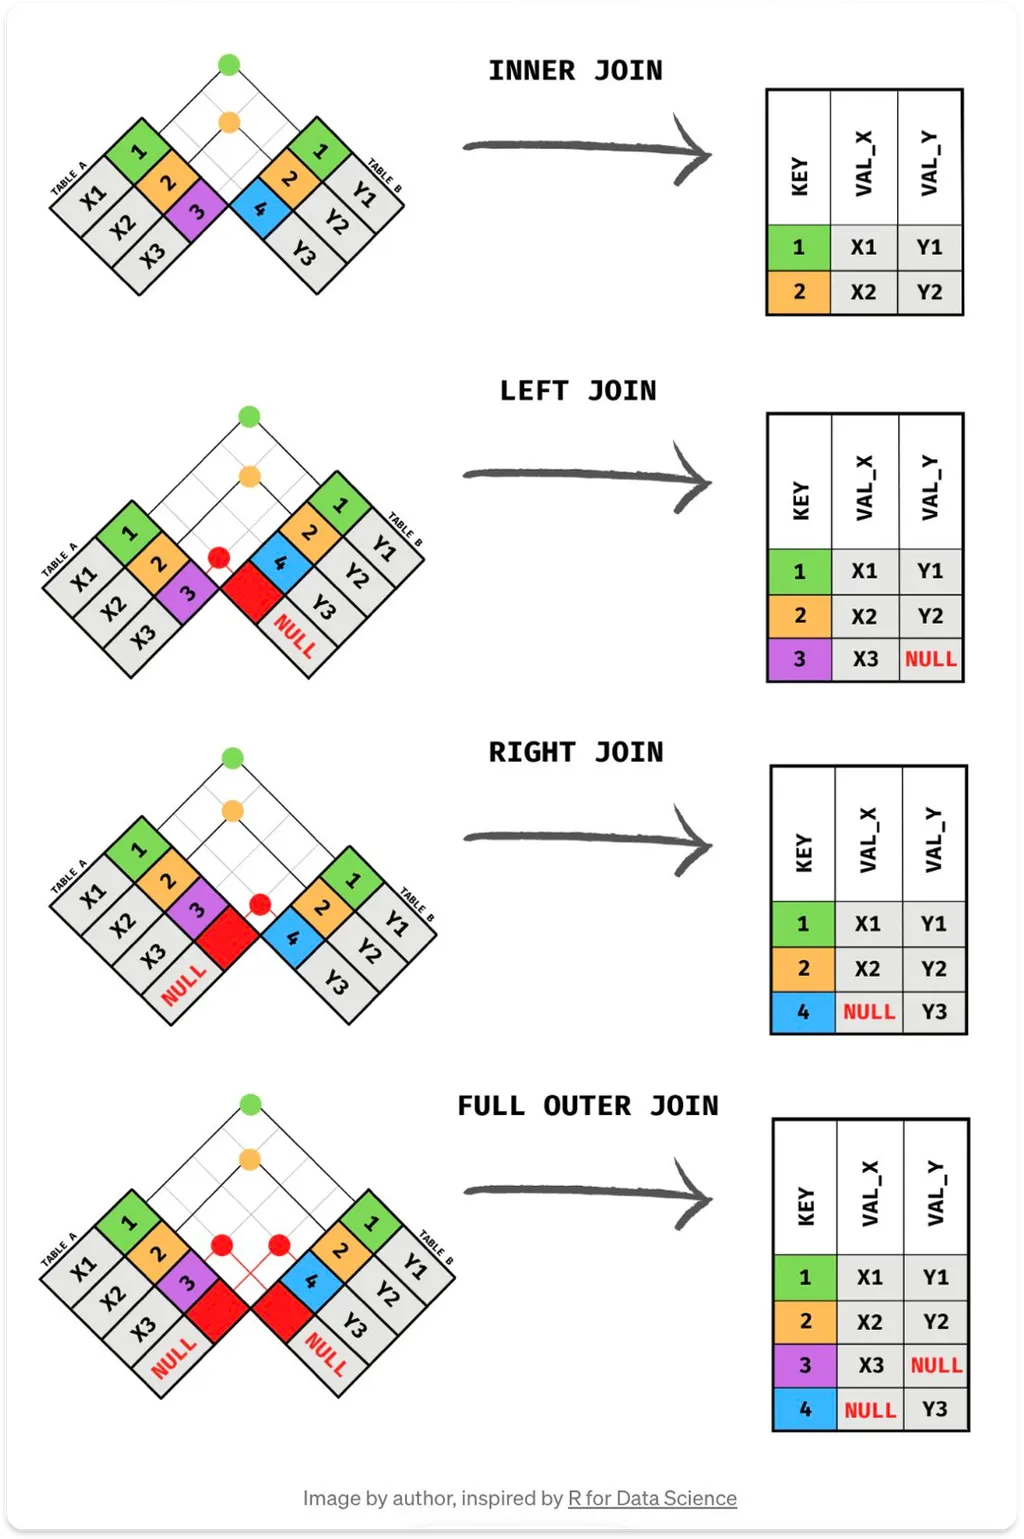

## Join 방식

- 내부 조인 (Inner Join): 두 데이터프레임에 모두 존재하는 기준 열에 대해서 병합을 수행한다.
`how='inner'`

- 왼쪽 조인 (Left Join): 첫 번째(왼쪽) 데이터프레임의 열을 기준으로 병합을 수행한다.
`how='left'`

- 오른쪽 조인 (Right Join): 두 번째(오른쪽) 데이터프레임의 열을 기준으로 병합을 수행한다.
`how='right'`

- 외부 조인 (Outer Join): 두 데이터프레임에 존재하는 모든 열에 대해 병합을 수행한다.
`how='outer'`

- `on` : 병합을 할 때 기준이 되는 열 이름을 지정한다.

### inner join

In [2]:
pd.merge(
    df_left,
    df_right,
    on = "Key",
    how = "inner"
    )

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [3]:
pd.merge(
    df_left,
    df_right,
    on = "Key",
    how = "right"
    )

,Key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K4,NaN,NaN,C3,D3


## [실습]

2. **`head()`** 와 **`info()`** 를 사용하여 데이터의 구조를 파악한다.
3. **`student_df`**와 **`enrollment_df`**를 **`학생ID`**를 기준으로 INNER JOIN 해서 각 학생의 수강 학점을 함께 출력한다.
4. **`enrollment_df`**와 **`lecture_df`**를 **`강의ID`**를 기준으로 LEFT JOIN 해서 각 수강 데이터의 강의 이름을 함께 출력한다.

### 생성 코드

In [4]:
import pandas as pd
import random

# 학생 데이터프레임
student_df = pd.DataFrame(
    {
        "학생ID": range(101, 111),
        "학과": [
            random.choice(["컴퓨터공학과", "전자공학과", "기계공학과"])
            for _ in range(10)
        ],
    }
)

# 강의 데이터프레임
lecture_df = pd.DataFrame(
    {
        "강의ID": [1001, 1002, 1003, 1004],
        "강의 이름": ["프로그래밍 기초", "웹 개발", "데이터 분석", "데이터베이스"],
    }
)

n = 100
# 수강 데이터프레임
enrollment_df = pd.DataFrame(
    {
        "수강ID": range(1, n + 1),
        "학생ID": [random.choice(student_df["학생ID"]) for _ in range(n)],
        "강의ID": [random.choice(lecture_df["강의ID"]) for _ in range(n)],
        "학점": [random.choice(["A", "B", "C", "D", "F"]) for _ in range(n)],
    }
)

### 실행 코드

In [7]:
student_df.head()
lecture_df.head()
enrollment_df.head()
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   학생ID    10 non-null     int64 
 1   학과      10 non-null     object
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


In [8]:
pd.merge(
    student_df,
    enrollment_df,
    on = "학생ID",
    how = "inner"
)

pd.merge(
    enrollment_df,
    lecture_df,
    on = "강의ID",
    how = "left"
)

,수강ID,학생ID,강의ID,학점,강의 이름
0,1,105,1001,A,프로그래밍 기초
1,2,107,1002,B,웹 개발
2,3,106,1003,D,데이터 분석
3,4,110,1004,A,데이터베이스
4,5,101,1001,A,프로그래밍 기초
...,...,...,...,...,...
95,96,104,1003,C,데이터 분석
96,97,109,1004,F,데이터베이스
97,98,105,1002,B,웹 개발
98,99,103,1004,B,데이터베이스


# 테이블 피봇

- 피봇은 재구조화가 목적이고, groupby는 특정 컬럼 그룹화가 목적이다.

- 데이터프레임을 이루는 행(index), 열(column), 값(value)의 관계를 재구조화해서 원하는 형태로 바꾼다.

## 피봇

**`DataFrame.pivot(index, column, value)`**

- 행(index), 열(column), 값(value)를 선택해서 데이터프레임을 재구조화 한다.
- **행과 열에 중복된 데이터가 없어야한다.**

### 예시 코드

In [14]:
import pandas as pd
import random

random.seed(0)

num_rows = 20
data = {
    "지점": ["학여울역점", "강남역점", "건대역점", "홍대역점", "삼성역점"] * 4,
    "제품": [
        item
        for item in ["노트북", "스마트폰", "냉장고", "세탁기"]
        for _ in range(5)
    ],
    "판매량": [random.randint(100, 500) for _ in range(num_rows)],
    "매출": [random.randint(1000, 5000) for _ in range(num_rows)],
}

df = pd.DataFrame(data)

In [15]:
df.head()

,지점,제품,판매량,매출
0,학여울역점,노트북,297,4274
1,강남역점,노트북,488,2026
2,건대역점,노트북,315,4726
3,홍대역점,노트북,120,3181
4,삼성역점,노트북,232,3888


In [16]:
# 지점 -> 행
# 제품 -> 열
# 값 -> 판매량

df.pivot(index = "지점", columns = "제품", values = "판매량")

제품,냉장고,노트북,세탁기,스마트폰
지점,,,,
강남역점,398,488,171,348
건대역점,211,315,486,307
삼성역점,171,232,416,344
학여울역점,283,297,244,361
홍대역점,358,120,148,255


In [17]:
# 각 지점의 제품 매출
df.pivot(index = "지점", columns = "제품", values = "매출")

제품,냉장고,노트북,세탁기,스마트폰
지점,,,,
강남역점,3989,2026,2352,3465
건대역점,1302,4726,2933,4695
삼성역점,4483,3888,1412,2270
학여울역점,1404,4274,3801,4318
홍대역점,4681,3181,3292,1601


## 피봇 테이블

**`DataFrame.pivot_table(index, columns, values, aggfunc)`**

- 데이터프레임을 피봇하면서 중복된 데이터에 대해 집계 함수를 적용한다.
- 열(columns)을 제외하고 사용할 수 있다.
- **`aggfunc`** : 중복 데이터에 적용할 집계함수

### 예시 코드

In [18]:
import pandas as pd
import random

random.seed(0)

num_rows = 10000
data = {
    "지점": [
        random.choice(["학여울역점", "강남역점", "건대역점", "홍대역점", "삼성역점"])
        for _ in range(num_rows)
    ],
    "제품": [
        random.choice(["노트북", "스마트폰", "냉장고", "세탁기", "건조기"])
        for _ in range(num_rows)
    ],
    "판매량": [random.randint(100, 500) for _ in range(num_rows)],
    "매출": [random.randint(1000, 5000) for _ in range(num_rows)],
}

df = pd.DataFrame(data)

In [19]:
# 지점에 대한 제품의 판매량 평균
df.pivot_table(index = "지점", columns = "제품", values = "판매량", aggfunc = "mean")

제품,건조기,냉장고,노트북,세탁기,스마트폰
지점,,,,,
강남역점,305.785714,295.175487,296.698376,305.847328,292.360000
건대역점,293.139024,299.735802,304.928406,304.324742,299.821705
삼성역점,305.521739,300.927007,289.262467,306.812155,301.449315
학여울역점,305.392683,296.428198,306.158690,309.103448,307.943902
홍대역점,294.000000,303.141388,306.990453,287.258065,289.748235


In [20]:
# 지점에 대한 제품의 판매량 합계
df.pivot_table(index='지점', columns='제품', values='판매량', aggfunc='sum')

제품,건조기,냉장고,노트북,세탁기,스마트폰
지점,,,,,
강남역점,124149,105968,127877,120198,124253
건대역점,120187,121393,132034,118078,116031
삼성역점,133513,123681,110209,111066,110029
학여울역점,125211,113532,121545,125496,126257
홍대역점,116424,117922,128629,106860,123143


In [21]:
# 열지정이 필수는 아니다.
df.pivot_table(index='지점', values='판매량', aggfunc='sum')

,판매량
지점,
강남역점,602445
건대역점,607723
삼성역점,588498
학여울역점,612041
홍대역점,592978


### 여러개의 index와 values를 지정

- [ ]리스트에 저장해서 지정한다.

In [22]:
df.pivot_table(index=["지점", "제품"], values=["판매량", "매출"], aggfunc="sum")

매출     판매량
지점    제품                   
강남역점  건조기   1182163  124149
      냉장고   1084724  105968
      노트북   1323289  127877
      세탁기   1162955  120198
      스마트폰  1268539  124253
건대역점  건조기   1237742  120187
      냉장고   1179529  121393
      노트북   1336208  132034
      세탁기   1149271  118078
      스마트폰  1169379  116031
삼성역점  건조기   1292577  133513
      냉장고   1272033  123681
      노트북   1154500  110209
      세탁기   1073989  111066
      스마트폰  1083717  110029
학여울역점 건조기   1208084  125211
      냉장고   1157739  113532
      노트북   1174839  121545
      세탁기   1193264  125496
      스마트폰  1277259  126257
홍대역점  건조기   1191792  116424
      냉장고   1150326  117922
      노트북   1309917  128629
      세탁기   1143143  106860
      스마트폰  1336035  123143

## [실습]

1. 아래 `vgsales.csv` 파일을 다운로드 받아서 데이터프레임 생성하고, 실습 문제를 해결한다.
    
    [Video Game Sales](https://www.kaggle.com/datasets/yasrebi/video-game-sales)
    
    [vgsales.csv](https://prod-files-secure.s3.us-west-2.amazonaws.com/f2678325-6f7b-4a25-b188-86c42030d6d5/badb809f-442f-4952-9c55-f043b77d4423/vgsales.csv)
    
    - 데이터 설명
        - title : 게임 이름
        - console : 출시 플랫폼(예시 : PC, PS4 등)
        - genre : 게임 장르
        - publisher : 게임 발매사
        - developer : 게임 개발사
        - critic_score : 평론가 점수
        - total_sales : 전 세계 판매량(단위 : 백만장)
        - na_sales : 북미 판매량(단위 : 백만장)
        - jp_sales : 일본 판매량(단위 : 백만장)
        - pal_sales : 유럽 및 아프리카 판매량(단위 : 백만장)
        - otehr_sales : 기타 지역 판매량(단위 : 백만장)
        - release_date : 게임 출시 날짜
2. **`console`** 열을 기준으로 **`total_sales`** 의 합계를 계산한 피봇 테이블을 출력한다.
3. **`genre`** 열을 기준으로 **`total_sales`** 의 평균을 계산한 피봇 테이블을 출력한다.
4. **`genre`** 열과 **`console`** 열을 각각 행과 열로 지정하여 **`total_sales`** 의 평균을 계산한 피봇 테이블을 출력한다.

In [24]:
df = pd.read_csv('/content/drive/MyDrive/PM_교육/DataSets/vgsales.csv')

In [25]:
 # 플랫폼을 기준으로 전 세계 판매량의 합계를 계산
 result = df.pivot_table(index="console", values="total_sales", aggfunc="sum")

 # PS 행 데이터 선택
 result.loc["PS"]

,PS
total_sales,546.25


In [30]:
# Series 객체는 기준 열(by) 가 없어도 정렬이 가능하다.

df.groupby("genre")["total_sales"].mean().sort_values()

,total_sales
genre,
Visual Novel,0.026514
Board Game,0.110000
Strategy,0.144280
Adventure,0.171891
Puzzle,0.176044
Party,0.214138
Education,0.242500
Simulation,0.268198
Misc,0.278338


In [28]:
df.pivot_table(index="genre", columns="console", values="total_sales", aggfunc="mean")

console,2600,3DO,3DS,DC,DS,GB,GBA,GBC,GC,GEN,...,SNES,VC,WS,WW,Wii,WiiU,X360,XB,XBL,XOne
genre,,,,,,,,,,,,,,,,,,,,,
Action,0.462540,NaN,0.146637,0.060000,0.211165,0.620000,0.240058,NaN,0.230494,1.037500,...,0.154000,NaN,NaN,NaN,0.357022,0.211154,0.694850,0.298571,0.075,0.457647
Action-Adventure,NaN,NaN,0.242581,NaN,0.190000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.362500,0.285200,0.910741,0.710000,NaN,0.509000
Adventure,NaN,0.06,0.115000,0.132000,0.197147,0.260000,0.362037,1.89,0.247097,0.095000,...,0.375000,NaN,NaN,NaN,0.289174,0.100000,0.419545,0.169333,NaN,0.103714
Board Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,NaN,NaN,NaN
Education,NaN,NaN,0.090000,NaN,NaN,NaN,NaN,NaN,0.120000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.520000,NaN,NaN,NaN
Fighting,0.620000,0.09,0.160714,0.135455,0.171892,NaN,0.161923,NaN,0.277500,1.110000,...,0.540476,0.000,NaN,NaN,0.231957,0.130000,0.576462,0.246042,0.010,0.343125
MMO,NaN,NaN,0.170000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.156667,NaN,NaN,NaN,0.543333
Misc,0.255000,NaN,0.116667,NaN,0.151187,0.565000,0.287692,NaN,0.193103,0.030000,...,0.141875,NaN,NaN,0.25,0.421031,0.246000,0.418406,0.206889,0.000,0.565000
Music,NaN,NaN,0.177778,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.790435,0.296923,0.470000,NaN,NaN,0.350769


In [29]:
# 장르와 플랫폼에 대한 전세계판매량과 북미 판매량의 평균과 합 피봇 테이블
df.pivot_table(
    index="genre",
    columns="console",
    values=["total_sales", "na_sales"],
    aggfunc=["mean", "sum"],
)

mean                                                   \
                  na_sales                                                    
console               2600       3DS    DC        DS    GB       GBA    GBC   
genre                                                                         
Action            0.431746  0.139189   NaN  0.203095  0.94  0.173697    NaN   
Action-Adventure       NaN  0.128462   NaN  0.270000   NaN       NaN    NaN   
Adventure              NaN  0.085556   NaN  0.207314   NaN  0.273864  0.895   
Board Game             NaN       NaN   NaN       NaN   NaN       NaN    NaN   
Education              NaN  0.080000   NaN       NaN   NaN       NaN    NaN   
Fighting          0.580000  0.086667   NaN  0.108500   NaN  0.116000    NaN   
MMO                    NaN       NaN   NaN       NaN   NaN       NaN    NaN   
Misc              0.235000  0.126250   NaN  0.159654   NaN  0.200957    NaN   
Music                  NaN  0.160000   NaN       NaN   NaN       NaN    NaN   
Party                  NaN  0.164000   NaN       NaN   NaN       NaN    NaN   
Platform          1.021250  0.134444  1.26  0.196835   NaN  0.228043    NaN   
Puzzle            0.664444  0.137857   NaN  0.118632   NaN  0.150952    NaN   
Racing            0.598000  0.122000  1.10  0.147879   NaN  0.119589    NaN   
Role-Playing           NaN  0.137200   NaN  0.154066   NaN  0.190000    NaN   
Sandbox                NaN       NaN   NaN       NaN   NaN       NaN    NaN   
Shooter           0.857200  0.061667   NaN  0.143415   NaN  0.052500    NaN   
Simulation             NaN  0.170476   NaN  0.230290   NaN  0.165500    NaN   
Sports            0.268333  0.091500  1.07  0.138857  0.90  0.110860    NaN   
Strategy               NaN  0.120000   NaN  0.166471   NaN  0.205385    NaN   
Visual Novel           NaN  0.030000   NaN       NaN   NaN       NaN    NaN   

                                                ...         sum               \
                                                ... total_sales                
console                 GC       GEN       N64  ...        WiiU WinP    X360   
genre                                           ...                            
Action            0.174938  1.415000  0.218235  ...        5.49  0.0  161.90   
Action-Adventure       NaN       NaN       NaN  ...        7.13  NaN   24.59   
Adventure         0.181935       NaN  0.076667  ...        0.30  0.0   27.69   
Board Game             NaN       NaN       NaN  ...         NaN  NaN    0.02   
Education         0.090000       NaN       NaN  ...        0.00  NaN    0.52   
Fighting          0.209063  1.586667  0.460400  ...        0.52  NaN   37.47   
MMO                    NaN       NaN       NaN  ...        0.47  NaN     NaN   
Misc              0.149259       NaN  0.269000  ...        3.69  0.0   57.74   
Music                  NaN       NaN       NaN  ...        3.86  NaN    9.40   
Party                  NaN       NaN       NaN  ...        1.33  NaN    0.22   
Platform          0.192500  1.130000  0.227727  ...        3.45  0.0   17.16   
Puzzle            0.239091       NaN  0.200909  ...        0.68  0.0    1.70   
Racing            0.158226       NaN  0.234565  ...        0.85  0.0   66.37   
Role-Playing      0.154762       NaN  0.180000  ...        2.16  NaN   65.10   
Sandbox                NaN       NaN       NaN  ...         NaN  NaN     NaN   
Shooter           0.148571       NaN  0.301818  ...        1.89  0.0  231.35   
Simulation        0.348182       NaN  0.183333  ...        0.00  0.0   10.98   
Sports            0.142596  1.350000  0.288095  ...        3.58  NaN  141.09   
Strategy          0.121250       NaN  0.110000  ...        0.02  0.0    6.24   
Visual Novel           NaN       NaN       NaN  ...         NaN  NaN    0.25   

                                                          
                                                          
console              XB   XBL   XOne   XS  ZXS  iOS iQue  
genre                      